In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns



data = pd.read_excel('source.xlsm', engine='openpyxl')


In [6]:
def chauvenet_criterion(df, column):
    N = len(df)
    mean = df[column].mean()
    std = df[column].std()
    distances = np.abs(df[column] - mean) / std
    
    probabilities = 1 - stats.norm.cdf(distances)  
    total_probabilities = 2 * probabilities  
    
    threshold = 1 / (2 * N)
    df["is_outlier"] = total_probabilities < threshold
    return df

result = chauvenet_criterion(data, "car model year")


result[(result['is_outlier'])].shape

(11, 6)

In [7]:
result[(result['is_outlier'])]

,First name,Last name,country,car make,car model year,is_outlier
139,Filippo,Wheelband,China,Pontiac,1961,True
165,Germayne,Ebbin,Indonesia,Chevrolet,1958,True
171,Edan,Commins,Greece,Chevrolet,1964,True
225,Cammy,Derill,Thailand,Ford,1958,True
365,Dyan,Hedgeman,Russia,Ford,1965,True
410,Auguste,Seatter,Indonesia,Studebaker,1961,True
421,Keenan,Feenan,China,Pontiac,1965,True
423,Quill,Verecker,China,Studebaker,1963,True
489,Roddy,Burlingame,China,Chevrolet,1960,True
526,Muhammad,Gerhardt,South Korea,Pontiac,1966,True


In [8]:

dataCarModeYearD = data['car model year'].describe()
lowBound = dataCarModeYearD['25%'] - (1.5 * (dataCarModeYearD['75%'] - dataCarModeYearD['25%']))
highBound = dataCarModeYearD['75%'] + (1.5 * (dataCarModeYearD['75%'] - dataCarModeYearD['25%']))
result = data[(data['car model year'] < lowBound) | (data['car model year'] > highBound)]
result[(result['is_outlier'])].shape

(11, 6)

In [9]:
result[(result['is_outlier'])]

,First name,Last name,country,car make,car model year,is_outlier
139,Filippo,Wheelband,China,Pontiac,1961,True
165,Germayne,Ebbin,Indonesia,Chevrolet,1958,True
171,Edan,Commins,Greece,Chevrolet,1964,True
225,Cammy,Derill,Thailand,Ford,1958,True
365,Dyan,Hedgeman,Russia,Ford,1965,True
410,Auguste,Seatter,Indonesia,Studebaker,1961,True
421,Keenan,Feenan,China,Pontiac,1965,True
423,Quill,Verecker,China,Studebaker,1963,True
489,Roddy,Burlingame,China,Chevrolet,1960,True
526,Muhammad,Gerhardt,South Korea,Pontiac,1966,True


In [10]:
whr = pd.read_csv("whr.csv").dropna()

<Axes: >

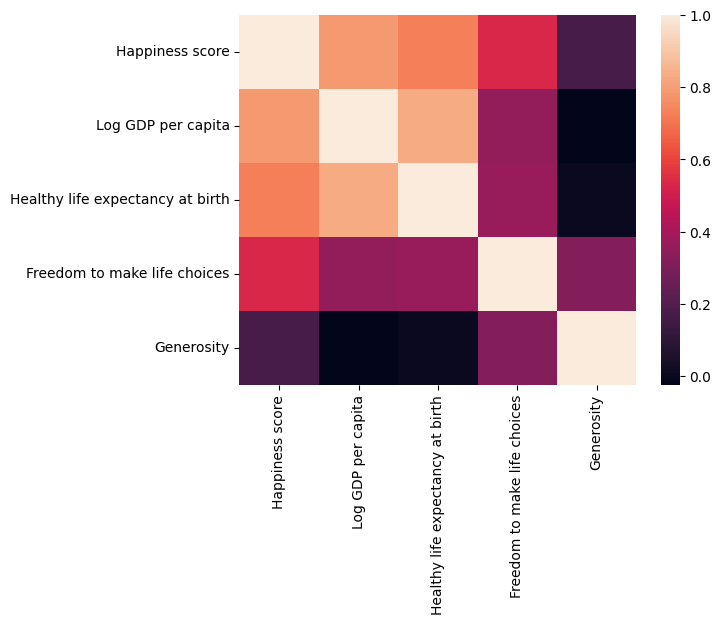

In [13]:
cr = whr[["Happiness score", "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity"]].corr()
sns.heatmap(cr)

0      0.411227
1      0.829566
2      0.007112
3      0.411227
4      1.052958
         ...   
995    0.620396
996    0.620396
997    0.829566
998    0.934150
999    0.320866
Name: car model year, Length: 1000, dtype: float64